In [1]:
%matplotlib inline
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from pytrends.request import TrendReq

In [2]:
kw_list = ["how to breakup"]
pytrends = TrendReq(hl='en-US', tz=360)
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')

HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)


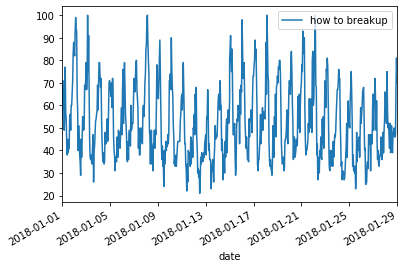

In [3]:
# Interest Over Time
trends = pytrends.interest_over_time()
trendsTime = pytrends.get_historical_interest(
    kw_list, year_start=2018, month_start=1, day_start=1, hour_start=0,
    year_end=2018, month_end=2, day_end=1, hour_end=0, cat=0, geo='', gprop='',
    sleep=0
)
trendsTime.plot(y=["how to breakup"])

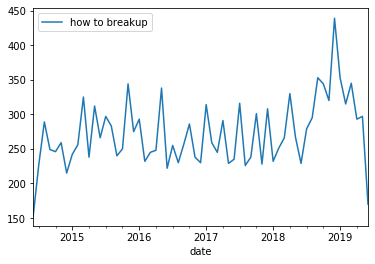

In [4]:
# Interest by Month
resample = trends.resample('M').sum()
resample.plot(y=["how to breakup"])

[]

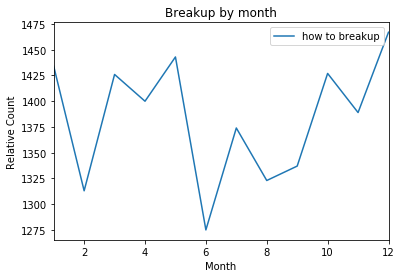

In [5]:
# Interest by Different Timescales
reshapedByMonth = trends.groupby([trends.index.month], as_index=True).sum()
ax = reshapedByMonth.plot(title='Breakup by month')
ax.set_xlabel("Month")
ax.set_ylabel("Relative Count")
plt.plot()

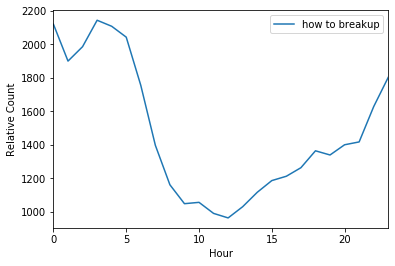

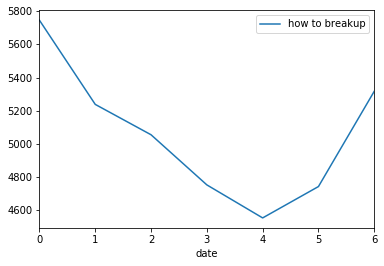

In [6]:
reshapedByArbitrary = trendsTime.groupby([trendsTime.index.hour], as_index=True).sum()
ax = reshapedByArbitrary.plot()
ax.set_xlabel("Hour")
ax.set_ylabel("Relative Count")
plt.plot()
#ax.get_figure().savefig('break.png',dpi=500)


reshapedByArbitrary = trendsTime.groupby([trendsTime.index.dayofweek], as_index=True).sum()
reshapedByArbitrary.plot()

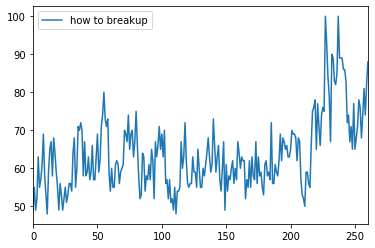

In [7]:
trends.reset_index(level=0, inplace=True)
trends.head()
trends["date"] = pd.to_datetime(trends["date"])
trends.groupby([trends.date.dt.year, trends.date.dt.month]).agg('count')
trends.plot(y =['how to breakup'])